In [1]:
import numpy as np
import pandas as pd

In [108]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (25, 6)
%matplotlib inline

In [2]:
colnames = ['GameID','Drive','qtr','down','yrdline100','posteam','DefensiveTeam','TimeSecs','sp','ScoreDiff',
            'HomeTeam','AwayTeam']

In [3]:
data_09 = pd.read_csv('data/new_data/pbp_2009.csv',usecols=colnames)

In [4]:
data_10 = pd.read_csv('data/new_data/pbp_2010.csv',usecols=colnames)

In [5]:
data_11 = pd.read_csv('data/new_data/pbp_2011.csv',usecols=colnames)

In [6]:
data_12 = pd.read_csv('data/new_data/pbp_2012.csv',usecols=colnames)

In [7]:
data_13 = pd.read_csv('data/new_data/pbp_2013.csv',usecols=colnames)

In [8]:
data_14 = pd.read_csv('data/new_data/pbp_2014.csv',usecols=colnames)

In [9]:
data_15 = pd.read_csv('data/new_data/pbp_2015.csv',usecols=colnames)

In [10]:
data_16 = pd.read_csv('data/new_data/pbp_2016.csv',usecols=colnames)

In [11]:
data_17 = pd.read_csv('data/new_data/pbp_2017.csv',usecols=colnames)

In [12]:
data = pd.concat([data_09, data_10, data_11, data_12, data_13, data_14, data_15, data_16, data_17])

In [13]:
data.shape

(388476, 12)

In [14]:
data = data.dropna(axis=0, how='any')

In [15]:
data.shape

(330202, 12)

In [16]:
data = data[data['TimeSecs'] >= 0]

In [17]:
data.shape

(327847, 12)

#### Columns to include in the formation of buckets [Down, TimeSecs, YdsToGo and Score Diff]

In [18]:
data['homeScoreDiff'] = data[['posteam','ScoreDiff','HomeTeam']].apply(
    lambda x: x['ScoreDiff'] if x['posteam']==x['HomeTeam'] else (-x['ScoreDiff']),axis=1)

The range of each variable
- down = [1,4] Four buckets from here
- ydstogo = [0,100] 10 buckets from here
- homeScoreDiff = [-60, 60] 30 buckets from here 
- TimeSecs = [0,3600] 180 buckets from here

Total buckets = 180\*30\*10\*4 = 216000

In [19]:
data['DownClass'] = pd.cut(data['down'],4, labels=False)

In [20]:
data['TimeSecsClass'] = pd.cut(data['TimeSecs'],180, labels=False)

In [21]:
data['yrdline100Class'] = pd.cut(data['yrdline100'],10, labels=False)

In [22]:
data['homeScoreDiffClass'] = pd.cut(data['homeScoreDiff'],30, labels=False)

In [120]:
class_names = ['homeScoreDiffClass','yrdline100Class','TimeSecsClass','DownClass']

In [121]:
temp = data.groupby(class_names).size().reset_index(name='counts')

In [122]:
temp.head()

,homeScoreDiffClass,yrdline100Class,TimeSecsClass,DownClass,counts
0,0,0,5,0,1
1,0,0,10,2,1
2,0,0,10,3,1
3,0,0,12,1,1
4,0,0,13,0,1


Now temp contains the count of each existing class. From here, we've to add 0 for values of the classes that don't exist. The following code does that.

In [151]:
new_table = pd.pivot_table(temp,
                           index=class_names,
                           values='counts',
                           fill_value = 0,
                           dropna=False,
                           aggfunc=np.sum)

new_table stores the count for each class.

In [158]:
counts = list(new_table['counts'])

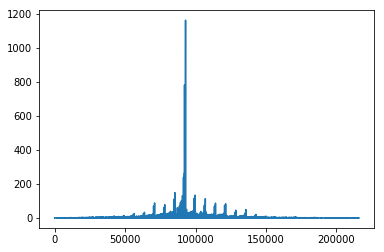

In [161]:
plt.plot(counts)

Total Classes = 216000

Classes with zero values = 139214

Classes with non zero values = 76786

In [170]:
temp.shape

(76786, 5)